# BEV PROJECT 

- [Wasserstien](https://github.com/AhmedYousriSobhi/W-Stereo-Disp) --> input: Left/Right image + Calib , output : Depthmap.
- [PsuedoLidar_V2](https://github.com/AhmedYousriSobhi/Pseudo_Lidar_V2.git) --> input Depthmap , output : points clouds + Planes.
- [Avod](https://github.com/AhmedYousriSobhi/avod) --> input: Images + points clouds + planes + calib , output : labels.
- [Kitti Visiualize](https://github.com/AhmedYousriSobhi/kitti_object_vis.git) --> input: labels converted + image_2 + calib+ point clouds , output: BEV


covert from avod format to kitti :
https://github.com/kujason/avod/wiki/Data-Formats

References:

[PSMNET](https://github.com/JiaRenChang/PSMNet)
[Avod PAPER](https://arxiv.org/abs/1712.02294)

In [1]:
# Check current Directory, Make sure you stand in The project Folder "repo folder".
!pwd

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project


# Wasserstien Disparity Github 
- [Github Forked link](https://github.com/AhmedYousriSobhi/W-Stereo-Disp.git)
- You don't have to clone it, it is already cloned.

## Dataset Download

If you have already KITTI dataset, So you can skip next Two cells. Make sure the dataset Folder is liked the following:
>KITTI/ <br>
>> val.txt <br>
 testing/ <br>
>>> image_2/ <br>
 image_3/ <br>
 calib/ <br>


In [ ]:
# install awscli "AWS Command Line" for python
!pip install awscli -qq 

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 547 kB 52.0 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 8.5 MB 38.3 MB/s 
     |████████████████████████████████| 138 kB 50.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
# Run dataset kitti download script.
!chmod +x ./W-Stereo-Disp/scripts/download_kitti.sh
! ./W-Stereo-Disp/scripts/download_kitti.sh

In [2]:
# val.txt file contain the idx of the images from the dataset, which you want to be used in Inferance.
!mv val.txt KITTI/

## Inferance Step:

In [66]:
# Install Python libararies Required for Wasserstien Disparity Github.
!pip3 install -r W-Stereo-Disp/src/requirements.txt -qq

  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-tg5ytj6d/pillow/setup.py'"'"'; __file__='"'"'/tmp/pip-install-tg5ytj6d/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-8oyqamht
       cwd: /tmp/pip-install-tg5ytj6d/pillow/
  Complete output (172 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.8
  creating build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/PaletteFile.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/XVThumbImagePlugin.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/ImageFont.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/ImageStat.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/PalmImagePlugin.py -> build/lib.l

In [5]:
"""
# Downloading Checkpoint and Best Model pre-trained, to be used as inferance.
# Checkpoints should be located inside floder --> W-Stereo-Disp/checkpoints/
# Steps:
#      1-Create a folder in W-Stereo-Disp folder
#      2-Download the files.
#      3-Return to main project folder.
"""
%cd W-Stereo-Disp/
!mkdir checkpoints
%cd checkpoints/

# To Download checkpoint.pth.tar, model_best.pth.tar files
!gdown --id 1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77  # checkpoint.pth.tar
!gdown --id 10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o  # model_best.pth.tar
%cd ../..

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints
Downloading...
From: https://drive.google.com/uc?id=1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints/checkpoint.pth.tar
100%|██████████████████████████████████████| 64.0M/64.0M [00:41<00:00, 1.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints/model_best.pth.tar
100%|██████████████████████████████████████| 64.0M/64.0M [00:20<00:00, 3.10MB/s]
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


### Run Inferance
- This will generate the depthmap for the defined images numbers inside val.txt file.
- Output Location : KITTI/testing/depth_maps

In [3]:
!python3 'W-Stereo-Disp/src/main_depth.py' -c 'W-Stereo-Disp/src/configs/kitti_w1.config' \
    --bval 2 \
    --resume 'W-Stereo-Disp/checkpoints/checkpoint.pth.tar' --pretrain 'W-Stereo-Disp/checkpoints/model_best.pth.tar' --datapath  'KITTI/testing' \
    --data_list='KITTI/val.txt' --generate_depth_map

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/W-Stereo-Disp/src/logger.py:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if os.path.dirname(filepath) is not '':
[2021-12-30 14:05:13 main_depth.py:165] INFO     api_key: 
[2021-12-30 14:05:13 main_depth.py:165] INFO     arch: stackhourglass_volume
[2021-12-30 14:05:13 main_depth.py:165] INFO     btrain: 12
[2021-12-30 14:05:13 main_depth.py:165] INFO     bval: 2
[2021-12-30 14:05:13 main_depth.py:165] INFO     calib_value: 1017
[2021-12-30 14:05:13 main_depth.py:165] INFO     checkpoint_interval: -1
[2021-12-30 14:05:13 main_depth.py:165] INFO     config: W-Stereo-Disp/src/configs/kitti_w1.config
[2021-12-30 14:05:13 main_depth.py:165] INFO     data_list: KITTI/val.txt
[2021-12-30 14:05:13 main_depth.py:165] INFO     data_tag: None
[2021-12-30 14:05:13 main_depth.py:165] INFO     data_type: depth
[2021-12-30 14:05:13 main_depth.py:165] INFO     datapath: KITTI/testing
[2021-

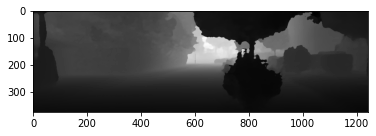

In [4]:
# Visualize Depthmap
import numpy as np
img_array = np.load('KITTI/testing/depth_maps/000000.npy')

from matplotlib import pyplot as plt

plt.imshow(img_array,cmap='gray')
plt.show()

### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
tensorboardx/ <br>
training.log <br>

- tensorboardsx , training.log are information about the model in wasserstien dissparity, Not needed in next steps.

# Pseudo Lidar V2
- [Github Forked link](https://github.com/AhmedYousriSobhi/Pseudo_Lidar_V2.git)
- You don't have to clone it, it is already cloned.

## Converting depthmaps to Points Cloud
- Inputs: calib, depth_maps.
- Output: points cloud
- Output location : KITTI/testing/velodyne/

In [5]:
# Convert depth maps to Pseudo-Lidar Point Clouds
!python3 ./Pseudo_Lidar_V2/src/preprocess/generate_lidar_from_depth.py --calib_dir  "KITTI/testing/calib" \
    --depth_dir "KITTI/testing/depth_maps/"  \
    --save_dir  "KITTI/testing/velodyne/"

Finish Depth 000000
Finish Depth 000001
Finish Depth 000002
Finish Depth 000003
Finish Depth 000004
Finish Depth 000005
Finish Depth 000006
Finish Depth 000007
Finish Depth 000008
Finish Depth 000009
Finish Depth 000010
Finish Depth 000011
Finish Depth 000012
Finish Depth 000013
Finish Depth 000014


## Ground Planes

- Inputs : calib, points cloud.
- Outputs : Ground Planes.
- Output location : KITTI/testing/planes/ 

In [6]:
!python3 ./Pseudo_Lidar_V2/src/preprocess/kitti_process_RANSAC.py --calib_dir  "KITTI/testing/calib" \
    --lidar_dir "KITTI/testing/velodyne" \
    --planes_dir  "KITTI/testing/planes"

-------------  000000
[ 0.00613745 -0.99995193 -0.00764649]
1.699845557275071
-------------  000001
[-0.0033245  -0.99994831 -0.00960832]
1.6664752263549878
-------------  000002
[-0.0285424  -0.99955309  0.00888582]
1.621540251075823
-------------  000003
[-0.01225838 -0.99991774 -0.00377336]
1.7313440027620255
-------------  000004
[-0.02019578 -0.99979521 -0.00129441]
1.6655293937343765
-------------  000005
[-0.02976535 -0.99944179 -0.0151703 ]
1.7340352157229075
-------------  000006
[-0.0413786  -0.99914172  0.00190792]
1.627763433131525
-------------  000007
[ 0.0025306  -0.99999497  0.00191158]
1.702165681225579
-------------  000008
[-2.82353675e-02 -9.99601134e-01 -5.79906242e-04]
1.5928011073219144
-------------  000009
[-0.0090538  -0.99950758 -0.03004375]
1.7124456391691352
-------------  000010
[-0.02016364 -0.99978723 -0.00434908]
1.6753684741441384
-------------  000011
[-0.01175358 -0.99992107 -0.00443859]
1.6986284900553827
-------------  000012
[-0.00983006 -0.999934

### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
velodyne/ <br>
planes/ <br>
tensorboardx/ <br>
training.log <br>

# Avod
- [Github Forked link](https://github.com/AhmedYousriSobhi/avod.git)
- You don't have to clone it, it is already cloned.

In [33]:
# Install required Libararies for avod.
!pip3 install -r ./avod/requirements.txt

In [34]:
# Install required Libararies for wavedata.
!pip3 install -r ./avod/wavedata/requirements.txt

## Note:
- If this doesn't run, Remove CMakeCashe.txt from YOUR_PATH/avod/wavedata/wavedata/tools/core

In [7]:
!chmod +x ./avod/scripts/install/build_integral_image_lib.bash
!sh ./avod/scripts/install/build_integral_image_lib.bash

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/avod/wavedata/wavedata/tools/core/lib
Scanning dependencies of target integral_images_3d
[ 50%] Building CXX object CMakeFiles/integral_images_3d.dir/integral_images_3d.cpp.o
[100%] Linking CXX shared library libintegral_images_3d.so
[100

In [8]:
!sh ./avod/avod/protos/run_protoc.sh

Compiling protos in /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/avod/avod/protos
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/kitti_dataset.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/kitti_utils.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/mini_batch.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/layers.proto. Pl

In [12]:
# Avod code, is built on tensorflow V1, so we converted each:
#- import tensorflow as tf  --> import tensorflow.compat.v1 as tf
!pip install tensorflow==1.13.1

### Use these Steps if The inferace cell doesn't work:
File: avod/avod/data/outputs/pyramid_cars_with_aug_example.config 
- in Line 136 - dataset_dir =  change your dataset location.
- in Line 137 - data_split = name of split txt file.
- in Line 139 - data_split_dir = "" -- Empty string.

File: avod/avod/datasets/kitti/kitti_dataset.py - in Line 76
- possible_splits = ['val']
- import sys
- sys.path.insert(1, 'PATH_TO_LOCATION/avod/wavedata')

File: avod/avod/core/evaluator.py - line 373:
- checkpoint_to_restore = 'PATH_TO_LOCATION/avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints/pyramid_cars_with_aug_example_scratch_300_val-00120000'

In your dataset dir location, should have: 
- planes folder : output from pseudo-lidar-V2.
- velodyne folder : output from pseudo-lidar-V2.

In file ...... CHange output path.

Dataset testing used in wasserstien, training (testing) used in avod --> change.

In [47]:
# Checkpoints download
%mkdir avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
%cd avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
!gdown --id 1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
!unzip avod.zip
%rm -r avod.zip
%cd ../../../../..

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/checkpoints
Downloading...
From: https://drive.google.com/uc?id=1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/checkpoints/avod.zip
100%|████████████████████████████████████████| 248M/248M [01:10<00:00, 3.50MB/s]
Archive:  avod.zip
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.data-00000-of-00001  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.index  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.meta  
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


## Run Inferance:
- Inputs : All Files in KITTI folder.
- Outputs : labels for car location to be used in Car detection.
- Output location : /avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/proposals_and_scores/val/120000
### Note: These labels needed to be converted to KITTI label format, So just keep these output files in their place.

In [9]:
# Run Inferance
!python3 avod/avod/experiments/run_inference.py --checkpoint_name='pyramid_cars_with_aug_example' --data_split='val' --ckpt_indices=120 --device='1'

2021-12-30 14:09:35.729130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 14:09:35.752967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 14:09:35.753149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 14:09:35.764844: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

2021-12-30 14:09:40.371914: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.83GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-12-30 14:09:40.372203: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.83GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-12-30 14:09:40.544852: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-12-30 14:09:40.545563: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

Step 120000: 11 / 15, Inference on sample 000010
[[[255 199 123]
  [255 198 123]
  [255 200 125]
  ...
  [  8  11  14]
  [  5   7  11]
  [  6   7   6]]

 [[255 203 123]
  [255 200 122]
  [255 201 125]
  ...
  [  8   8   5]
  [  6   8   5]
  [  6   8   4]]

 [[255 201 127]
  [255 201 126]
  [255 204 127]
  ...
  [  7   8   6]
  [  5   7   6]
  [  6   6   4]]

 ...

 [[194 145 132]
  [131 132 113]
  [ 99 110  96]
  ...
  [ 47  93  96]
  [ 47  77  79]
  [ 44  63  70]]

 [[104  99  92]
  [ 89  94  95]
  [ 86  90  95]
  ...
  [ 58  97  99]
  [ 59  90  83]
  [ 55  81  68]]

 [[ 84  89  89]
  [ 86  87  88]
  [ 86  87  85]
  ...
  [ 58  93  98]
  [ 61  91  94]
  [ 60  86  88]]]
Step 120000: 12 / 15, Inference on sample 000011
[[[255 254 159]
  [255 252 160]
  [255 254 156]
  ...
  [ 40  36  31]
  [ 38  35  31]
  [ 38  36  32]]

 [[249 241 160]
  [223 243 164]
  [218 238 157]
  ...
  [ 40  37  31]
  [ 39  37  32]
  [ 40  37  33]]

 [[255 224  97]
  [228 199 100]
  [213 182 120]
  ...
  [ 42  37

In [ ]:
# !python3 avod/demos/show_predictions_2d.py

In [ ]:
# !python3 avod/demos/kitti_bev_vis.py

# Changing avod label format to KITTI label Format.
- Use Our Script to convert from Avod label format to KITTI label format, just like explaned in this [github](https://github.com/kujason/avod/wiki/Data-Formats)
- You can control the detection threshold by adding a --threshold < value >, defualt value is 0.02

In [19]:
!python3 to_kitti_format.py --avod_label_path "avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000" \
        --save_path KITTI/testing/label_2

Namespace(avod_label_path='avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000', save_path='KITTI/testing/label_2', threshold=0.0)
Opening FIle:  000000.txt
Opening FIle:  000001.txt
Opening FIle:  000002.txt
Opening FIle:  000003.txt
Opening FIle:  000004.txt
Opening FIle:  000005.txt
Opening FIle:  000006.txt
Opening FIle:  000007.txt
Opening FIle:  000008.txt
Opening FIle:  000009.txt
Opening FIle:  000010.txt
Opening FIle:  000011.txt
Opening FIle:  000012.txt
Opening FIle:  000013.txt
Opening FIle:  000014.txt
COMPLETED


### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
velodyne/ <br>
planes/ <br>
label_2/ <br>
tensorboardx/ <br>
training.log <br>

# Kitti Detect and Vis
- [Github Forked link](https://github.com/AhmedYousriSobhi/kitti_object_vis.git)
- You don't have to clone it, it is already cloned.

In [20]:
%cd kitti_object_vis/

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/kitti_object_vis


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [22]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [23]:
dataset = kitti_object('../KITTI', 'testing')
# Number of image you want to visualize its BEV
data_idx = 5
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

../KITTI testing
../KITTI/testing/velodyne/000005.bin
('All point num: ', 307080)
('FOV point num: ', (307069, 4))
pc_velo (307069, 4)
==================== (307069, 4)
box3d_pts_3d_velo:
[[ 9.1534909  -2.01244044 -1.54818345]
 [ 9.20616651 -3.52774627 -1.56364448]
 [ 6.09480561 -3.63556112 -1.59729917]
 [ 6.04213    -2.1202553  -1.58183814]
 [ 9.13856601 -2.02753094 -0.12004106]
 [ 9.19124162 -3.54283676 -0.13550209]
 [ 6.07988072 -3.65065162 -0.16915677]
 [ 6.02720511 -2.13534579 -0.15369575]]
box3d_pts_3d_velo:
[[13.74196262 -2.01626028 -1.51430327]
 [13.75982546 -3.61416314 -1.53100087]
 [10.09426436 -3.65473539 -1.56973674]
 [10.07640152 -2.05683253 -1.55303914]
 [13.72680983 -2.03158121 -0.06435329]
 [13.74467267 -3.62948407 -0.08105089]
 [10.07911157 -3.67005632 -0.11978676]
 [10.06124873 -2.07215346 -0.10308916]]
box3d_pts_3d_velo:
[[ 1.84792942e+01 -1.85174962e+00 -1.42214268e+00]
 [ 1.85012898e+01 -3.50939351e+00 -1.43942835e+00]
 [ 1.44001245e+01 -3.56335995e+00 -1.48285805e+

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

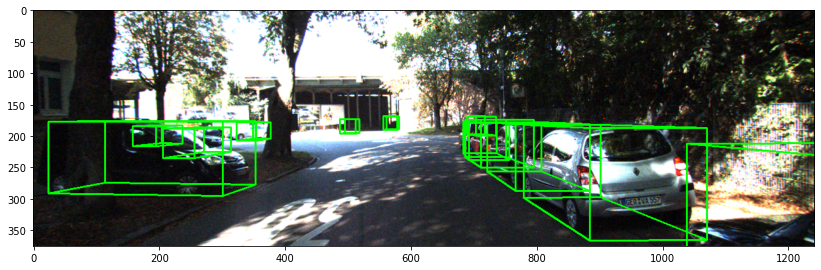

In [24]:
_, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


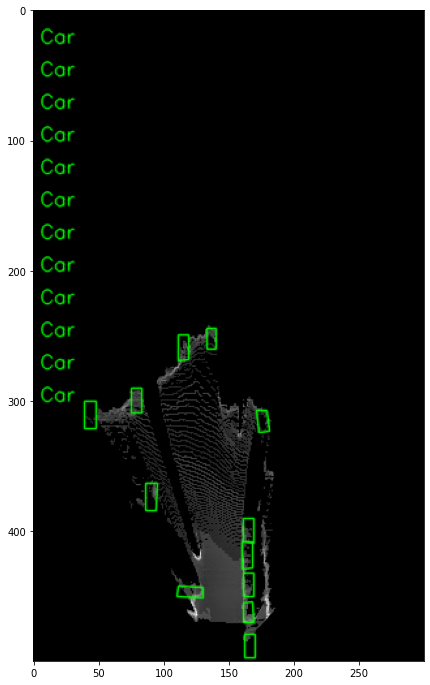

In [25]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()